In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [13]:
train_df = pd.read_csv('../data/aug_v8_train_df.csv')
train_df

Unnamed: 0  index                                          file_name  \
0               0      0                            ../data/train\10000.png   
1               1      1                            ../data/train\10001.png   
2               2      2                            ../data/train\10002.png   
3               3      3                            ../data/train\10003.png   
4               4      4                            ../data/train\10004.png   
...           ...    ...                                                ...   
17232       17232  17232  ../data/train\aug_v8\zipper-squeezed_teeth\aug...   
17233       17233  17233  ../data/train\aug_v8\zipper-squeezed_teeth\aug...   
17234       17234  17234  ../data/train\aug_v8\zipper-squeezed_teeth\aug...   
17235       17235  17235  ../data/train\aug_v8\zipper-squeezed_teeth\aug...   
17236       17236  17236  ../data/train\aug_v8\zipper-squeezed_teeth\aug...   

            class           state                  label  
0      transistor            good        transistor-good  
1         capsule            good           capsule-good  
2      transistor            good        transistor-good  
3            wood            good              wood-good  
4          bottle            good            bottle-good  
...           ...             ...                    ...  
17232      zipper  squeezed_teeth  zipper-squeezed_teeth  
17233      zipper  squeezed_teeth  zipper-squeezed_teeth  
17234      zipper  squeezed_teeth  zipper-squeezed_teeth  
17235      zipper  squeezed_teeth  zipper-squeezed_teeth  
17236      zipper  squeezed_teeth  zipper-squeezed_teeth  

[17237 rows x 6 columns]

# class 개수

In [14]:
label_list = list(train_df['class'].unique())
label_enc = {k:i for i, k in enumerate(label_list)}
label_dec = {v:k for k, v in label_enc.items()}

C:\Users\sub\AppData\Local\Temp\ipykernel_596\4056880475.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(class_cnt.keys(), rotation=90, fontsize=15)


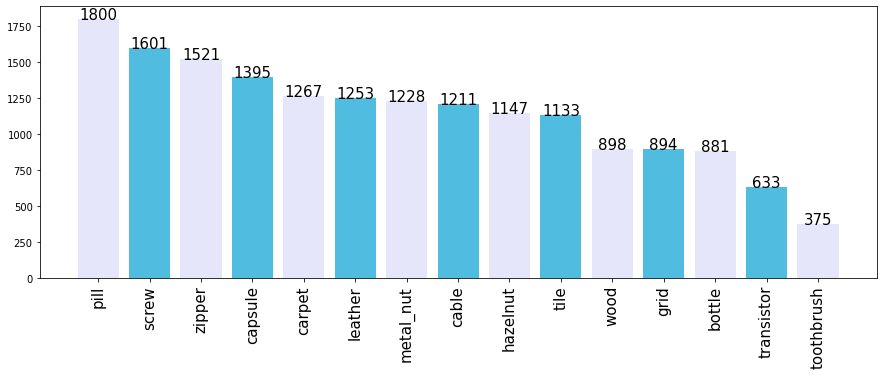

In [15]:
class_cnt = dict(train_df['class'].value_counts())#.sort_values(ascending=False)

f, axs = plt.subplots(1,1, figsize=(15,5))

axs.bar(class_cnt.keys(), class_cnt.values(), color=['#e6e6fa' if a%2==0 else '#50bcdf' for a in range(len(label_list))])
for k, v in class_cnt.items() :
    axs.annotate('%d'%(v), xy=(k, v), textcoords='data', ha='center',fontsize=15)
axs.set_xticklabels(class_cnt.keys(), rotation=90, fontsize=15)
# f.tight_layout()
plt.show()

# state 개수

C:\Users\sub\AppData\Local\Temp\ipykernel_596\947214010.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  label_comb_cnt[label] = {state : len(train_df[train_df['class']==label][train_df['state']==state])
C:\Users\sub\AppData\Local\Temp\ipykernel_596\947214010.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx].set_xticklabels(state.keys(), rotation=90,fontsize=10)
C:\Users\sub\AppData\Local\Temp\ipykernel_596\947214010.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx].set_xticklabels(state.keys(), rotation=90,fontsize=10)
C:\Users\sub\AppData\Local\Temp\ipykernel_596\947214010.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx].set_xticklabels(state.keys(), rotation=90,fontsize=10)
C:\Users\sub\AppData\Local\Temp\ipykernel_596\947214010.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx].

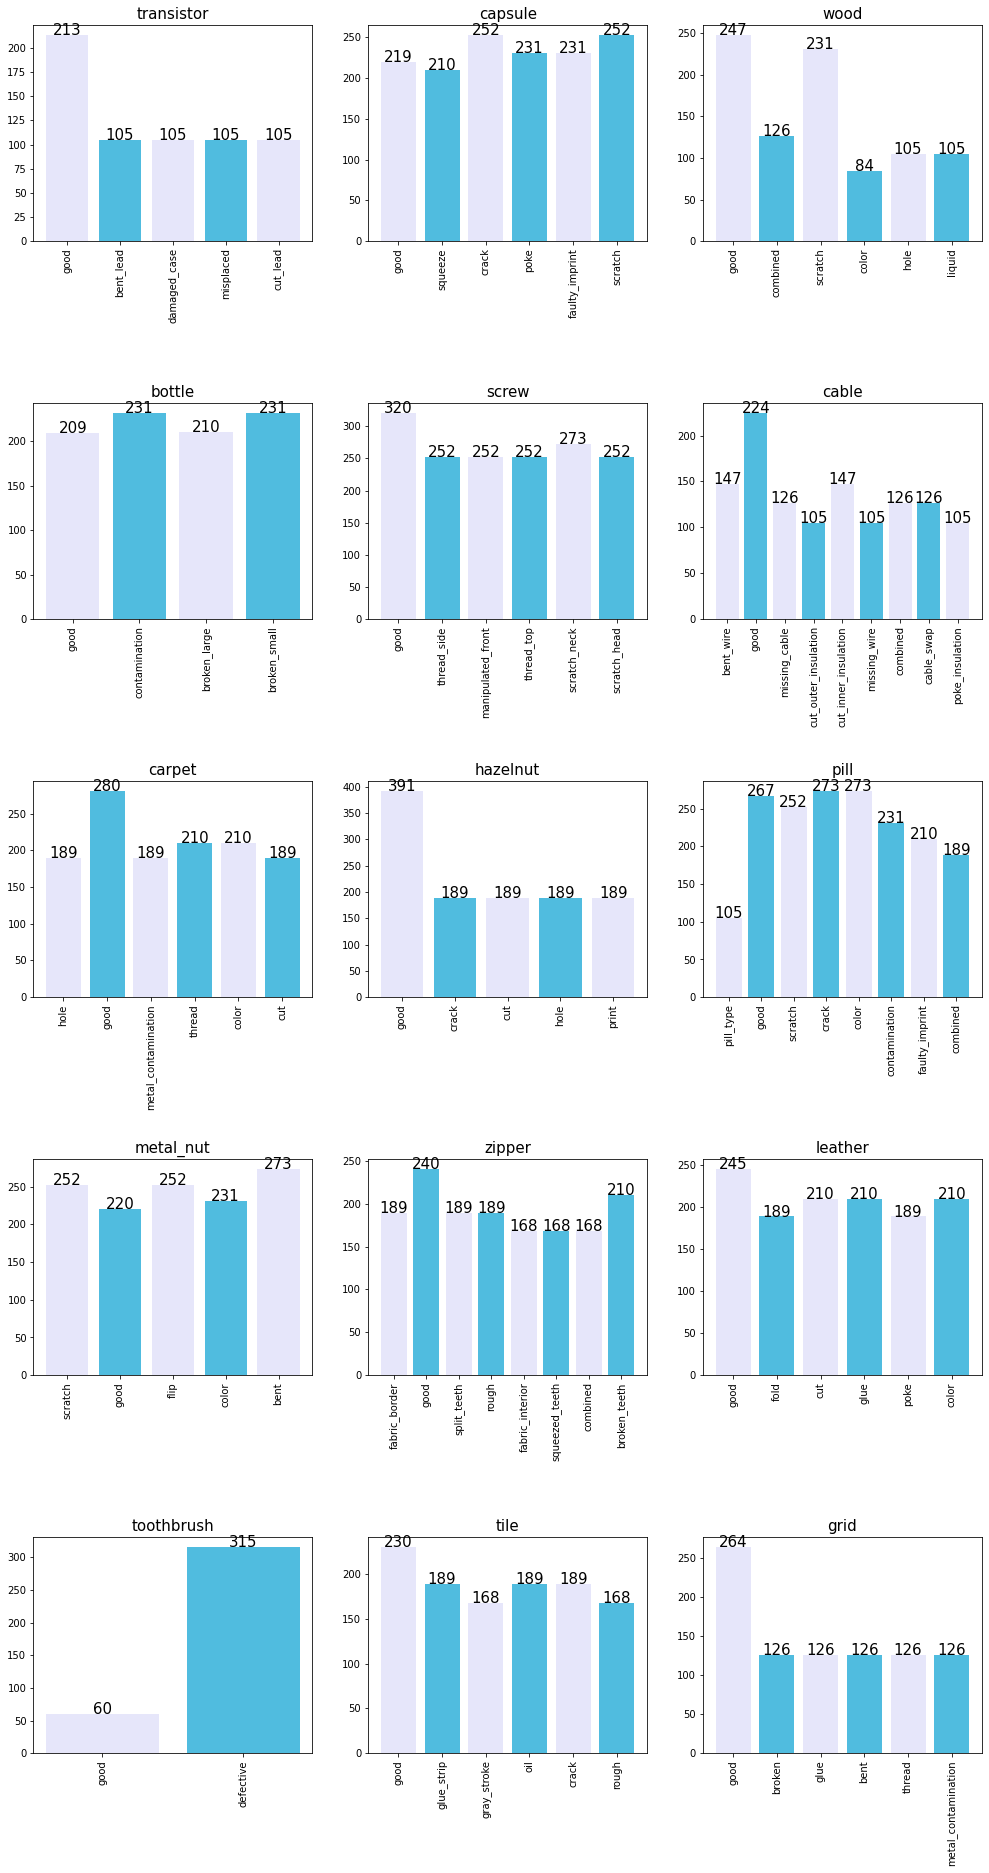

In [16]:
state_list = [list(train_df['state'][train_df['class']==label].unique()) for label in label_list]
label_comb_cnt = {}
for idx, label in enumerate(label_list) :
    label_comb_cnt[label] = {state : len(train_df[train_df['class']==label][train_df['state']==state]) 
                         for state in state_list[idx]}

f, axs = plt.subplots(5,3, figsize=(17, 30))
axs = axs.flatten()

for idx, (label, state) in enumerate(label_comb_cnt.items()) :
    axs[idx].bar(state.keys(), state.values(), color=['#e6e6fa' if a%2==0 else '#50bcdf' for a in range(len(state))])
    for k, v in state.items() :
        axs[idx].annotate('%d'%(v), xy=(k, v), textcoords='data', ha='center',fontsize=15)
    axs[idx].set_xticklabels(state.keys(), rotation=90,fontsize=10)
    axs[idx].set_title(label,fontsize=15)
    
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.75)
plt.show()

# class + state = label 개수 (조합 개수)

In [8]:
len(train_df['label'].unique())

88

# class 별 이미지

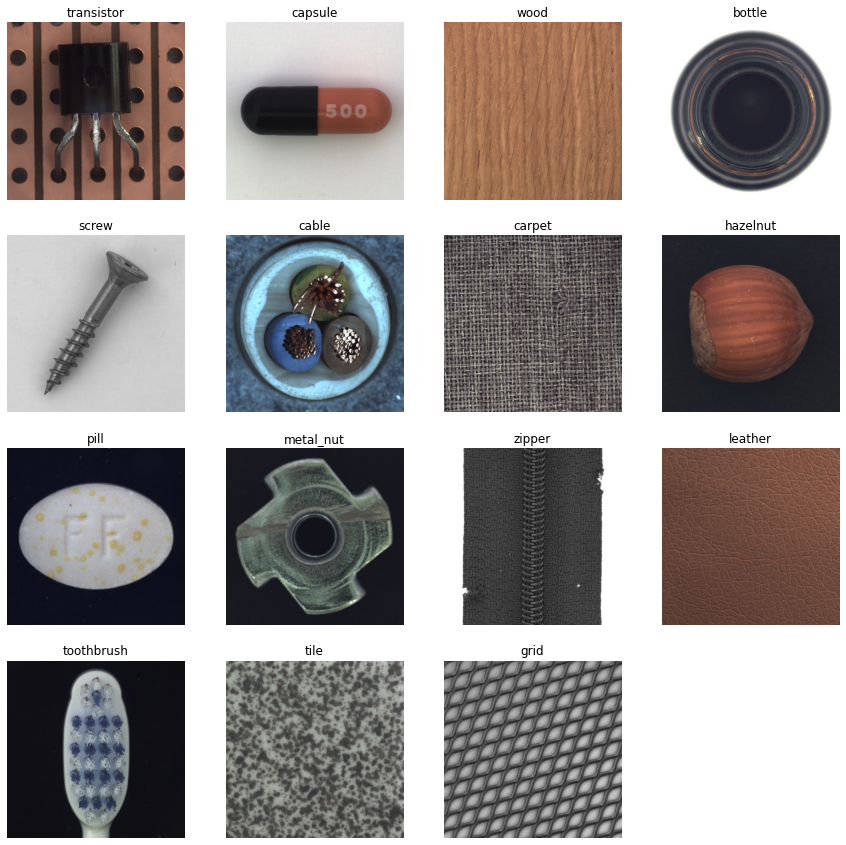

In [86]:
img_names = [list(train_df['file_name'][train_df['class']==label])[0] for label in label_list]
img_list = ['../data/train/'+ file_name for file_name in img_names]

fig, axs = plt.subplots(4,4, figsize=(15,15))
axs = axs.flatten()
for idx, (img_path, label) in enumerate(zip(img_list, label_list)) :

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[idx].imshow(img)
    axs[idx].set_title(label)
    axs[idx].set_axis_off()
fig.delaxes(axs[-1])
plt.show()

# class + label 조합 별 이미지

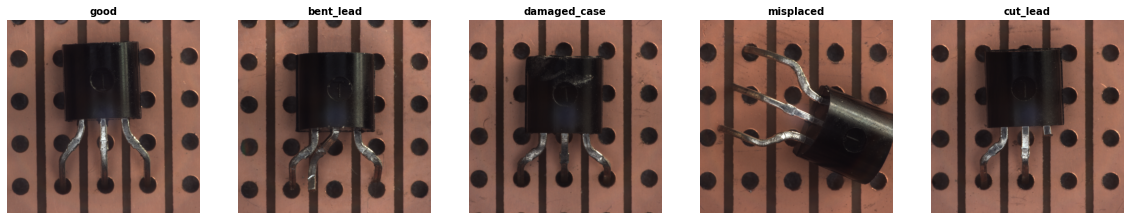

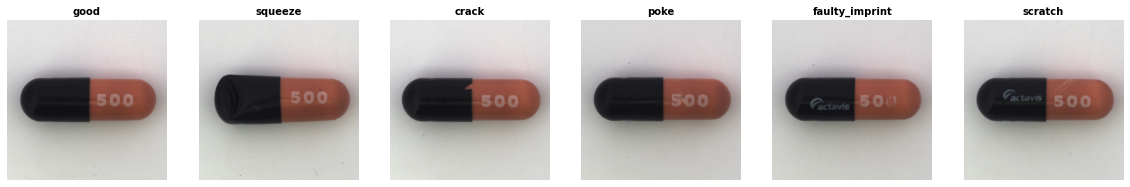

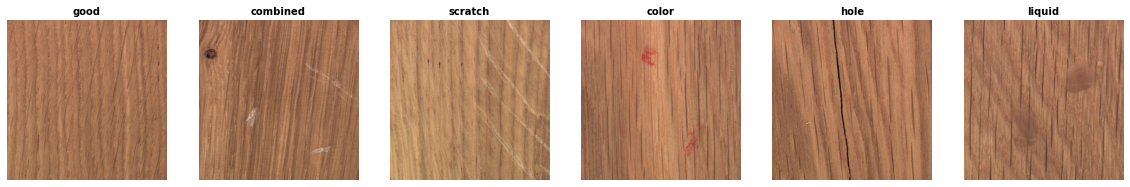

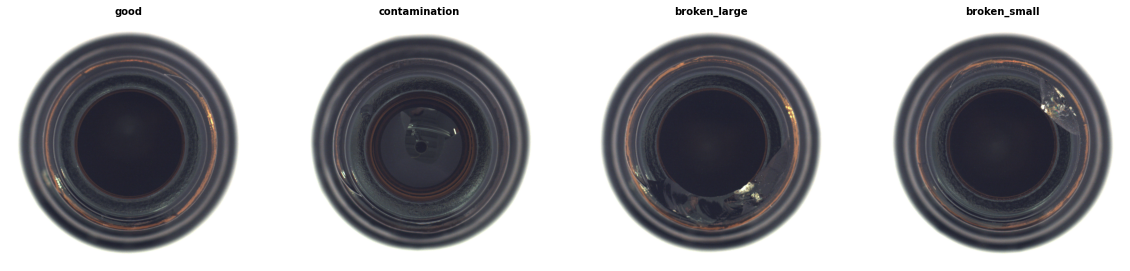

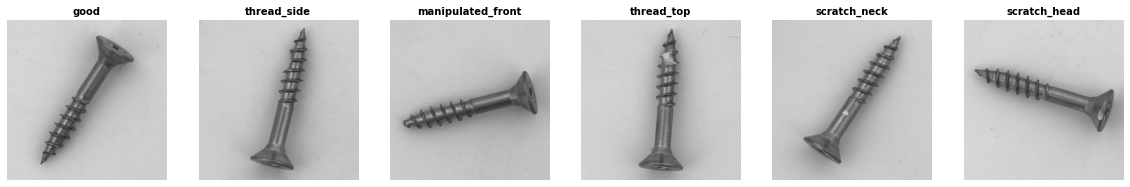

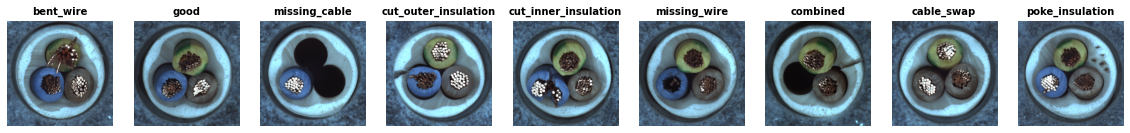

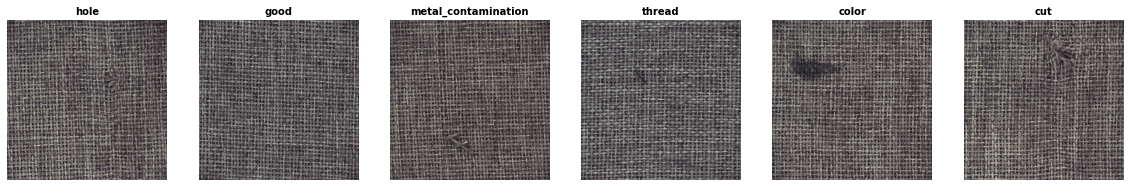

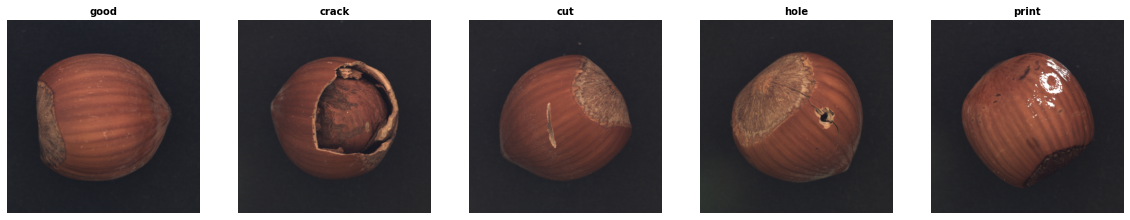

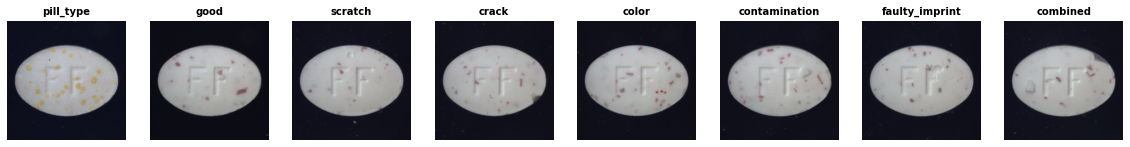

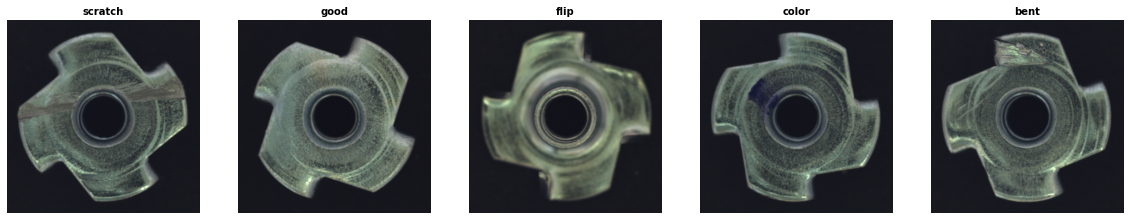

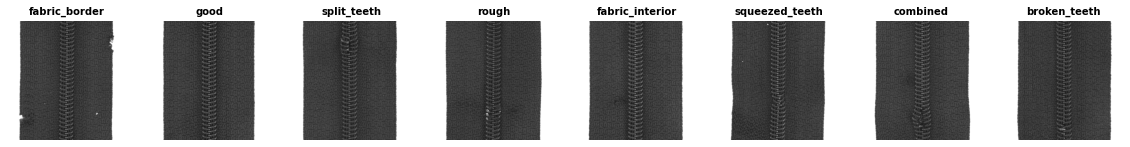

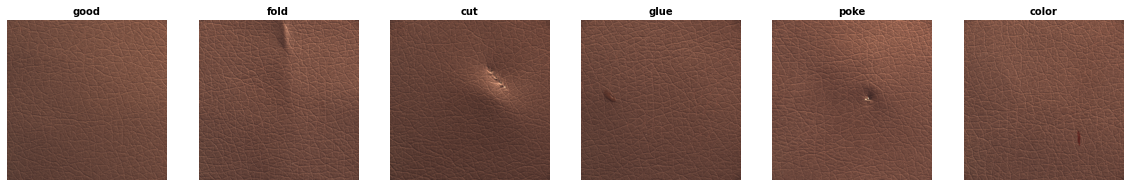

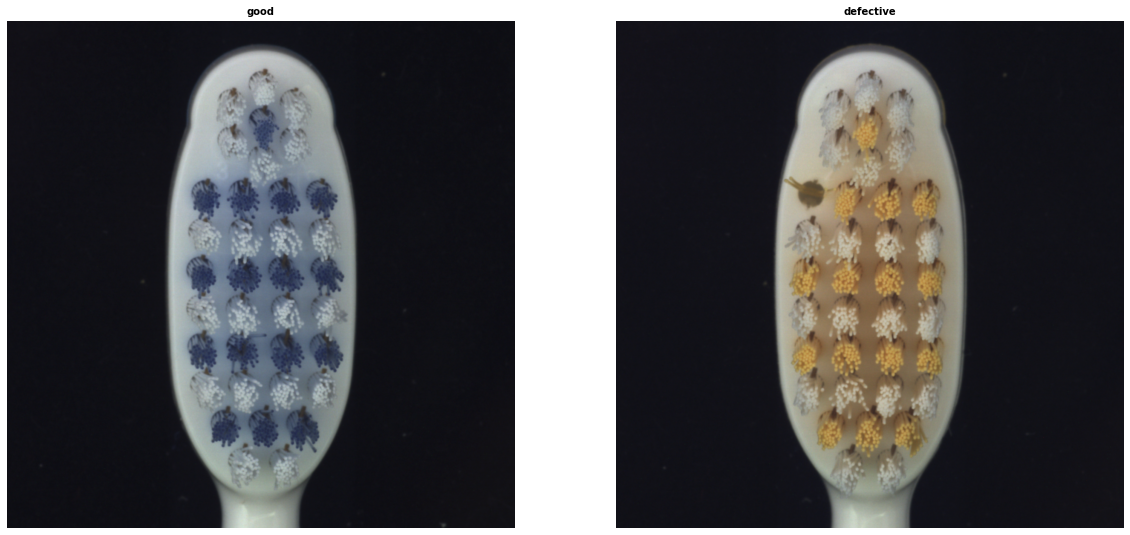

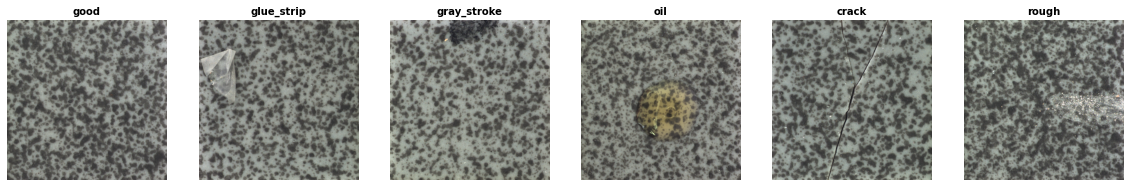

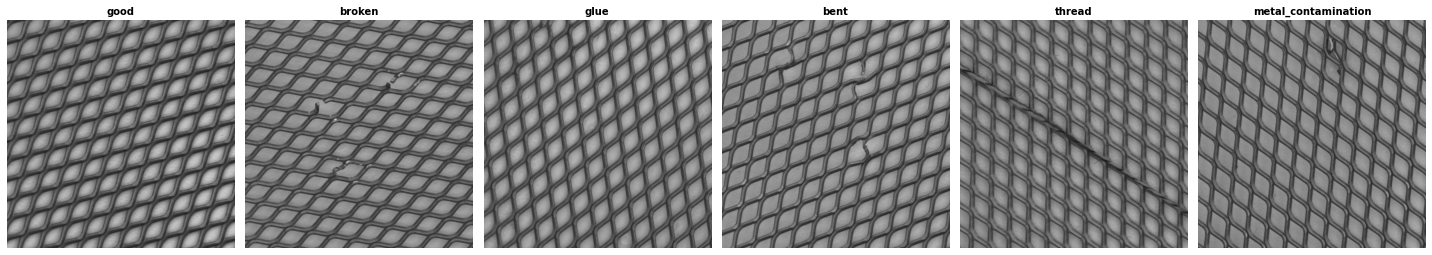

In [87]:
state_list = [list(train_df['state'][train_df['class']==label].unique()) for label in label_list]
label_comb_img = {}
for idx, label in enumerate(label_list) :
    label_comb_img[label] = {state : list(train_df['file_name'][train_df['class']==label][train_df['state']==state])[0]
                         for state in state_list[idx]}

for idx, (label, state) in enumerate(label_comb_img.items()) :
    f, axs = plt.subplots(1,len(state), figsize=(20, 40))
    axs = axs.flatten()
    for i, (k, v) in enumerate(state.items(), start=0) :
        img_path = '../data/train/'+ v
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        axs[i].imshow(img)
        axs[i].set_title(k, fontsize=10, fontweight='bold')
        axs[i].set_axis_off()
    

# plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.45)
f.tight_layout()
plt.show()
